In [2]:
import numpy as np

def logistic(x, w = 1, phase = 0, gain = 1):
    return gain / (1 + np.exp(-w * (x - phase)))

<Axes: ylabel='y'>

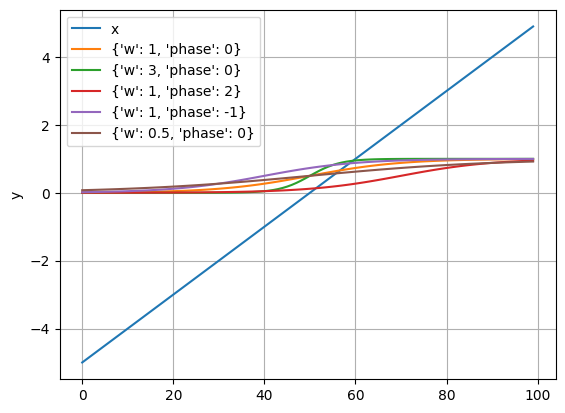

In [4]:
import pandas as pd
import seaborn as sns
sns.set_style()

xy = pd.DataFrame(np.arange(-50, 50) / 10, columns=['x'])
for w, phase in zip([1,3,1,1,0.5], [0,0,2, -1, 0]):
    kwargs = dict(w = w, phase = phase)
    xy[f'{kwargs}'] = logistic(xy['x'], **kwargs)

xy.plot(grid='on', ylabel='y')

## Simple neurons

In [5]:
from collections import Counter

np.random.seed(451)
tokens = 'green egg egg ham ham ham spam spam spam spam'.split()
bow = Counter(tokens)
x = pd.Series(bow)
x

green    1
egg      2
ham      3
spam     4
dtype: int64

In [6]:
x1, x2, x3, x4 = x
x1, x2, x3, x4

(1, 2, 3, 4)

In [7]:
w0 = np.round(.1 * np.random.randn(), 2)
w0

0.07

In [8]:
w1, w2, w3, w4 = (.1 * np.random.randn(len(x))).round(2)
w1, w2, w3, w4

(0.12, -0.16, 0.03, -0.18)

In [9]:
x = np.array([1, x1, x2, x3, x4])
w = np.array([w0, w1, w2, w3, w4])
y = np.sum(x * w)
y

-0.76

In [10]:
y = logistic(x)
y

array([0.73105858, 0.73105858, 0.88079708, 0.95257413, 0.98201379])

### Single neuron

In [13]:
def neuron(x, w):
    z = np.array(x).dot(w)
    return z > 0

## Sex logistics

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 7

In [11]:
np.random.seed(451)
df = pd.read_csv('https://gitlab.com/tangibleai/nlpia2/-/raw/main/src/nlpia2/data/baby-names-us-10k.csv.gz')
df.to_csv('baby-names-us-10k.csv.gz', compression='gzip')
df.shape

(10000, 7)

In [12]:
df

,Unnamed: 0,region,sex,year,name,count,freq
0,6139665,WV,F,1987,Brittani,10,0.000003
1,2565339,MD,F,1954,Ida,18,0.000005
2,22297,AK,M,1988,Maxwell,5,0.000001
...,...,...,...,...,...,...,...
9997,4475894,OK,F,1950,Leah,9,0.000003
9998,5744351,VA,F,2007,Carley,11,0.000003
9999,5583882,TX,M,2019,Kartier,10,0.000003


In [13]:
df.groupby(['name', 'sex'])['count'].sum()[('Timothy')]

sex
F       5
M    3538
Name: count, dtype: int64

In [16]:
groups = df.groupby(['name', 'sex'])
counts = groups['count'].sum()
counts

name    sex
Aaden   M      51
Aahana  F      26
Aahil   M       5
               ..
Zvi     M       5
Zya     F       8
Zylah   F       5
Name: count, Length: 4238, dtype: int64

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=False, analyzer='char', ngram_range=(1, 3))

In [19]:
df = pd.DataFrame([list(tup) for tup in counts.index.values], columns=['name', 'sex'])

In [21]:
df['count'] = counts.values
df

,name,sex,count
0,Aaden,M,51
1,Aahana,F,26
2,Aahil,M,5
...,...,...,...
4235,Zvi,M,5
4236,Zya,F,8
4237,Zylah,F,5


In [22]:
df['istrain'] = np.random.rand(len(df)) < .9
df

,name,sex,count,istrain
0,Aaden,M,51,True
1,Aahana,F,26,True
2,Aahil,M,5,True
...,...,...,...,...
4235,Zvi,M,5,True
4236,Zya,F,8,False
4237,Zylah,F,5,True


In [23]:
df.index = pd.MultiIndex.from_tuples(
    zip(df['name'], df['sex']), names= ['name_', 'sex_']
)
df

,,name,sex,count,istrain
name_,sex_,,,,
Aaden,M,Aaden,M,51,True
Aahana,F,Aahana,F,26,True
Aahil,M,Aahil,M,5,True
...,...,...,...,...,...
Zvi,M,Zvi,M,5,True
Zya,F,Zya,F,8,False
Zylah,F,Zylah,F,5,True


In [24]:
df_most_common = {}
for name, group in df.groupby('name'):
    row_dict = group.iloc[group['count'].argmax()].to_dict()
    df_most_common[(name, row_dict['sex'])] = row_dict

df_most_common = pd.DataFrame(df_most_common).T

In [25]:
df_most_common['istest'] = ~df_most_common['istrain'].astype(bool)
df_most_common

,,name,sex,count,istrain,istest
Aaden,M,Aaden,M,51,True,False
Aahana,F,Aahana,F,26,True,False
Aahil,M,Aahil,M,5,True,False
...,...,...,...,...,...,...
Zvi,M,Zvi,M,5,True,False
Zya,F,Zya,F,8,False,True
Zylah,F,Zylah,F,5,True,False


In [26]:
df['istest'] = df_most_common['istest']
df['istest'] = df['istest'].fillna(False)
df['istrain'] = ~df['istest']
istrain = df['istrain']
df['istrain'].sum() / len(df)

/var/folders/v6/fmnfcvjs7y54r0___bhdm7fm0000gs/T/ipykernel_79795/2800452534.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['istest'] = df['istest'].fillna(False)


0.9039641340254837

In [27]:
df['istest'].sum() / len(df)

0.09603586597451629

In [28]:
(df['istest'].sum() + df['istrain'].sum()) / len(df)

1.0

In [29]:
unique_names = df['name'][istrain].unique()
vectorizer.fit(unique_names)
vecs = vectorizer.transform(df['name'])
vecs

<4238x2863 sparse matrix of type '<class 'numpy.float64'>'
	with 59963 stored elements in Compressed Sparse Row format>

In [30]:
vecs = pd.DataFrame(vecs.toarray())
vecs.columns = vectorizer.get_feature_names_out()
vecs.index = df.index
vecs.iloc[:, :7]

,,a,aa,aac,aad,aah,aal,aan
name_,sex_,,,,,,,
Aaden,M,0.534522,0.267261,0.0,0.267261,0.000000,0.0,0.0
Aahana,F,0.769800,0.192450,0.0,0.000000,0.192450,0.0,0.0
Aahil,M,0.534522,0.267261,0.0,0.000000,0.267261,0.0,0.0
...,...,...,...,...,...,...,...,...
Zvi,M,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
Zya,F,0.447214,0.000000,0.0,0.000000,0.000000,0.0,0.0
Zylah,F,0.288675,0.000000,0.0,0.000000,0.000000,0.0,0.0


In [31]:
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 3), use_idf=False, lowercase=False)
vectorizer = vectorizer.fit(unique_names)
vecs = vectorizer.transform(df['name'])
vecs = pd.DataFrame(vecs.toarray())
vecs.columns = vectorizer.get_feature_names_out()
vecs.index = df.index
vecs.iloc[:, :5]

,,A,Aa,Aad,Aah,Aal
name_,sex_,,,,,
Aaden,M,0.288675,0.288675,0.288675,0.000000,0.0
Aahana,F,0.218218,0.218218,0.000000,0.218218,0.0
Aahil,M,0.288675,0.288675,0.000000,0.288675,0.0
...,...,...,...,...,...,...
Zvi,M,0.000000,0.000000,0.000000,0.000000,0.0
Zya,F,0.000000,0.000000,0.000000,0.000000,0.0
Zylah,F,0.000000,0.000000,0.000000,0.000000,0.0


In [49]:
df['name']

name_   sex_
Aaden   M        Aaden
Aahana  F       Aahana
Aahil   M        Aahil
                 ...  
Zvi     M          Zvi
Zya     F          Zya
Zylah   F        Zylah
Name: name, Length: 4238, dtype: object

## Deep learning framework

In [33]:
import re

dfs = pd.read_html('https://en.wikipedia.org/wiki/Comparison_of_deep-learning_software')
tabl = dfs[0]
tabl

,Software,Creator,Initial release,Software license[a],Open source,Platform,Written in,Interface,OpenMP support,OpenCL support,CUDA support,ROCm support[1],Automatic differentiation[2],Has pretrained models,Recurrent nets,Convolutional nets,RBM/DBNs,Parallel execution (multi node),Actively developed
0,BigDL,Jason Dai (Intel),2016,Apache 2.0,Yes,Apache Spark,Scala,"Scala, Python",NaN,NaN,No,No,NaN,Yes,Yes,Yes,NaN,NaN,NaN
1,Caffe,Berkeley Vision and Learning Center,2013,BSD,Yes,"Linux, macOS, Windows[3]",C++,"Python, MATLAB, C++",Yes,Under development[4],Yes,No,Yes,Yes[5],Yes,Yes,No,?,No[6]
2,Chainer,Preferred Networks,2015,BSD,Yes,"Linux, macOS",Python,Python,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No[7]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,Torch,"Ronan Collobert, Koray Kavukcuoglu, Clement Fa...",2002,BSD,Yes,"Linux, macOS, Windows,[64] Android,[65] iOS","C, Lua","Lua, LuaJIT,[66] C, utility library for C++/Op...",Yes,Third party implementations[68][69],Yes[70][71],No,Through Twitter's Autograd[72],Yes[73],Yes,Yes,Yes,Yes[64],No
22,Wolfram Mathematica 10[74] and later,Wolfram Research,2014,Proprietary,No,"Windows, macOS, Linux, Cloud computing","C++, Wolfram Language, CUDA",Wolfram Language,Yes,No,Yes,No,Yes,Yes[75],Yes,Yes,Yes,Yes[76],Yes
23,Software,Creator,Initial release,Software license[a],Open source,Platform,Written in,Interface,OpenMP support,OpenCL support,CUDA support,ROCm support[77],Automatic differentiation[2],Has pretrained models,Recurrent nets,Convolutional nets,RBM/DBNs,Parallel execution (multi node),Actively developed


In [35]:
import torch

class LogisticRegressionNN(torch.nn.Module):
    def __init__(self, num_features, num_outputs=1):
        super().__init__()
        self.linear = torch.nn.Linear(num_features, num_outputs)

    def forward(self, X):
        return torch.sigmoid(self.linear(X))
    
model = LogisticRegressionNN(num_features=vecs.shape[1], num_outputs=1)
model

LogisticRegressionNN(
  (linear): Linear(in_features=3687, out_features=1, bias=True)
)

In [36]:
loss_func_train = torch.nn.BCELoss(
    weight=torch.Tensor(df[['count']][istrain].values)
)
loss_func_test = torch.nn.BCELoss(
    weight=torch.Tensor(df[['count']][~istrain].values)
)
loss_func_train

BCELoss()

In [38]:
from torch.optim import SGD
hyperparams = {
    'momentum': 0.001,
    'lr': 0.02
}
optimizer = SGD(
    model.parameters(), **hyperparams
)
optimizer

/Users/hieu/miniconda3/envs/nlpia39/lib/python3.9/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.02
    maximize: False
    momentum: 0.001
    nesterov: False
    weight_decay: 0
)

In [41]:
X = vecs.values
y = (df[['sex']] == 'F').values
X_train = torch.Tensor(X[istrain])
y_train = torch.Tensor(y[istrain])
X_test = torch.Tensor(X[~istrain])
y_test = torch.Tensor(y[~istrain])
X_train.shape

torch.Size([3831, 3687])

In [43]:
from tqdm import tqdm
num_epochs = 200
pbar_epochs = tqdm(range(num_epochs), desc='Epoch', total = num_epochs)

for epoch in pbar_epochs:
    optimizer.zero_grad()
    outputs = model(X_train)
    loss_train = loss_func_train(outputs, y_train)
    loss_train.backward()
    optimizer.step()

Epoch: 100%|██████████| 200/200 [00:01<00:00, 119.38it/s]


In [44]:
def make_array(x):
    if hasattr(x, 'detach'):
        return torch.squeeze(x).detach().numpy()
    return x

In [46]:
def measure_binary_accuracy(y_pred, y):
    y_pred = make_array(y_pred).round()
    y = make_array(y).round()
    num_correct = (y_pred == y).sum()
    return num_correct / len(y)

In [47]:
for epoch in range(num_epochs):
    optimizer.zero_grad()  # #1
    outputs = model(X_train)
    loss_train = loss_func_train(outputs, y_train)
    loss_train.backward()
    epoch_loss_train = loss_train.item()
    optimizer.step()

    outputs_test = model(X_test)
    loss_test = loss_func_test(outputs_test, y_test).item()
    accuracy_test = measure_binary_accuracy(outputs_test, y_test)

    if epoch % 20 == 19:  # #2
        print(f'Epoch {epoch}:'
              f' loss_train/test: {loss_train.item():.4f}/{loss_test:.4f},'
              f' accuracy_test: {accuracy_test:.4f}')

Epoch 19: loss_train/test: 50.2131/86.7178, accuracy_test: 0.7199
Epoch 39: loss_train/test: 49.5189/86.7538, accuracy_test: 0.7199
Epoch 59: loss_train/test: 48.8625/86.7882, accuracy_test: 0.7248
Epoch 79: loss_train/test: 48.2403/86.8212, accuracy_test: 0.7273
Epoch 99: loss_train/test: 47.6492/86.8526, accuracy_test: 0.7248
Epoch 119: loss_train/test: 47.0862/86.8826, accuracy_test: 0.7224
Epoch 139: loss_train/test: 46.5491/86.9111, accuracy_test: 0.7248
Epoch 159: loss_train/test: 46.0358/86.9381, accuracy_test: 0.7248
Epoch 179: loss_train/test: 45.5443/86.9637, accuracy_test: 0.7248
Epoch 199: loss_train/test: 45.0729/86.9877, accuracy_test: 0.7273
